In [1]:
from google.colab import files
uploaded = files.upload()


Saving fake_news_dataset.csv to fake_news_dataset (1).csv


In [2]:
import pandas as pd

# Replace filename here with your actual file name
df = pd.read_csv("fake_news_dataset.csv")

# Show first few rows
df.head()


,title,text,date,source,author,category,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake


In [7]:
# Convert labels to numeric values
df['label'] = df['label'].map({'fake': 0, 'real': 1})

# Drop rows with missing data
df.dropna(inplace=True)

# Keep only text and label columns
df = df[['text', 'label']]
df.head()


,text,label
0,more tax development both store agreement lawy...,1
1,probably guess western behind likely next inve...,0
2,them identify forward present success risk sev...,0
3,phone which item yard Republican safe where po...,0
4,wonder myself fact difficult course forget exa...,0


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

X = tfidf.fit_transform(df['text'])
y = df['label']

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

model = MultinomialNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Accuracy: {round(accuracy * 100, 2)}%")


🎯 Accuracy: 51.29%


In [10]:
def check_news(news_text):
    input_data = tfidf.transform([news_text])
    prediction = model.predict(input_data)
    print("📰 This news is:", "Real" if prediction[0] == 1 else "Fake")

# Try example:
check_news("NASA successfully launches mission to study the sun")


📰 This news is: Fake


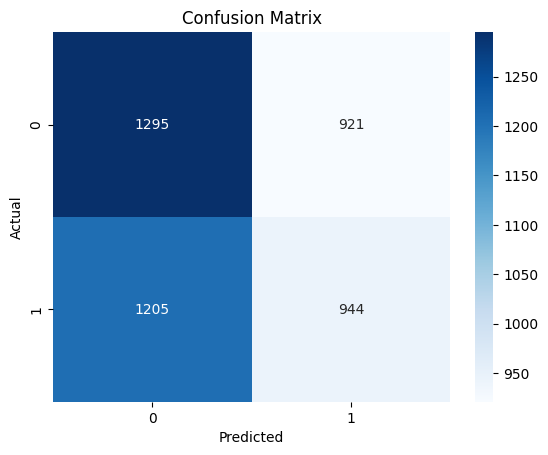

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
